# **Computação Visual**
*Prof. André Kishimoto*

- [Imagens em Python (PIL)](#imagens-em-python-pil)
- [Processamento de imagens](#processamento-de-imagens)
- [Exercícios](#exercícios)

#### **Observação**: *Ao enviar as alterações com sua solução final no repositório git, certifique-se que o notebook está com todas as saídas executadas, de forma que, ao abrir o arquivo no GitHub (navegador), todas as saídas estarão visíveis.*

# Imagens em Python (PIL)

Existem diversas maneiras para trabalharmos com imagens (I/O) em Python.

Uma possibilidade é usar a `PIL/Pillow`, biblioteca de imagem do Python (Python Imaging Library).

Você provavelmente deve ter o pacote instalado na sua máquina que contenha o Python. Vamos verificar?

In [1]:
import PIL

print(f'Versão do PIL/Pillow: {PIL.__version__}')

Versão do PIL/Pillow: 9.4.0


Caso não tenha, acesse o link [https://python-pillow.org/](https://python-pillow.org/) para verificar como instalar o pacote. Mesmo que não precise instalar, consulte o site para a documentação.

## Carregando uma imagem com PIL

Para carregar uma imagem com PIL, usamos o módulo `Image` e a função `open()`.

No exemplo a seguir, estamos assumindo que a imagem `kodim23.png` está no mesmo diretório que este notebook.

In [3]:
from PIL import Image

img = Image.open('kodim23.png')

## Atributos da imagem

Com a imagem carregada na memória e atribuída à variável `img`, podemos acessar atributos do arquivo de imagem, tais como resolução, formato e modo da imagem:

In [ ]:
print(f'img: {type(img)}')
print(f'Arquivo: {img.filename}')
print(f'Resolução: {img.size} ({img.width}x{img.height})')
print(f'Formato: {img.format}')
print(f'Modo: {img.mode}')

img: <class 'PIL.PngImagePlugin.PngImageFile'>
Arquivo: kodim23.png
Resolução: (768, 512) (768x512)
Formato: PNG
Modo: RGB


## Visualizando a imagem

Para abrir a imagem, podemos usar a função `show()`. Porém, a imagem será aberta no visualizador padrão da sua máquina. Observe que o arquivo em si nem sempre é o mesmo arquivo original (`kodim23.png`, nesse exemplo).

In [ ]:
img.show()

## Visualizando a imagem no notebook

Seria bom visualizarmos a imagem aqui no notebook, não? Para isso, vamos usar o `Matplotlib`:

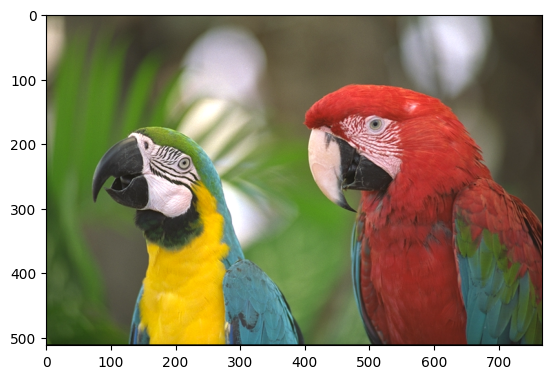

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

## Leitura e escrita dos pixels

`PIL` oferece funções para leitura e escrita dos pixels da imagem: `getpixel()` e `putpixel()`, respectivamente.

In [ ]:
print(img.getpixel((0, 0)))

(116, 116, 88)


O resultado anterior significa que o pixel na posição (0, 0) da imagem original (canto superior esquerdo) possui a cor (116, 116, 88). Ou seja, canal vermelho `R=116`, canal verde `G=116` e canal azul `B=88`, que resulta em uma cor no [tom amarelo escuro](https://www.colorhexa.com/747458).

In [ ]:
putpixel_count = 0
while putpixel_count < 512:
    img.putpixel((putpixel_count, putpixel_count), (255, 0, 255))
    putpixel_count += 1

No trecho de código anterior, alteramos parte dos pixels da imagem, preenchendo uma diagonal que começa em (0,0) e termina em (512, 512) com a cor magenta (`R=255`, `B=0`, `G=255`).

Exibindo a imagem novamente, com os pixels modificados, temos:

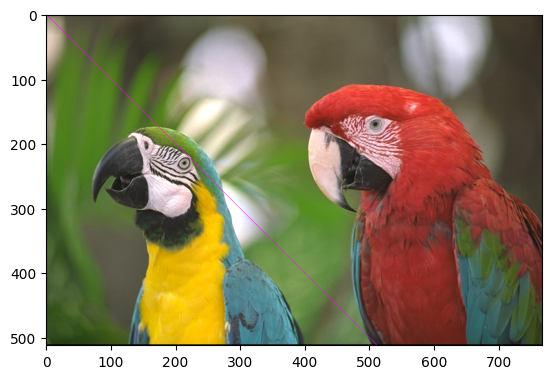

In [ ]:
plt.imshow(img)
plt.show()

## Salvando a imagem

Podemos salvar a imagem modificada com a função `save()`.

Queremos manter o arquivo original, portanto, vamos dar um novo nome para o arquivo.

In [ ]:
new_filename = f'{img.filename[:-4]}-modified.png'
img.save(new_filename)

## Imagens e NumPy

Podemos criar um array do `NumPy` com os pixels da imagem carregada e, a partir desse ponto, manipular diretamente os valores do array.

No trecho de código a seguir, leio novamente o arquivo, pois os pixels originais foram modificados anteriormente. O código a seguir também não depende da execução das células anteriores.

Tipo de img: <class 'PIL.PngImagePlugin.PngImageFile'>
Tipo de img_array: <class 'numpy.ndarray'>
Formato do array img_array: (512, 768, 3)


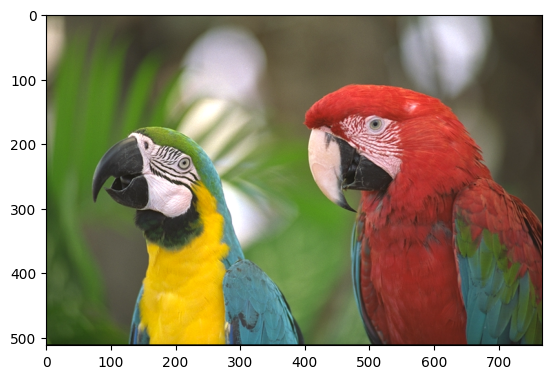

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

img = Image.open('kodim23.png')
img_array = np.array(img)

print(f'Tipo de img: {type(img)}')
print(f'Tipo de img_array: {type(img_array)}')
print(f'Formato do array img_array: {img_array.shape}')

plt.imshow(img_array)
plt.show()

# Processamento de imagens

## Inversão de cores

Uma operação que podemos realizar é a de inverter as cores de uma imagem, obtendo seu negativo, por meio da seguinte equação:

> $c = m - o$
>
> (eq. 1)

Sendo:
- $c$ : Cor final do pixel.
- $m$ : Valor máximo do pixel (255 ou 1.0, dependendo do tipo de dado).
- $o$ : Cor original do pixel.

No código a seguir, criamos um novo array do `NumPy` aplicando a equação 1 e usando o array com os pixels originais da imagem como o parâmetro $o$. Como os valores das cores são números inteiros que variam de 0 (sem influência do canal da cor) a 255 (máxima influência do canal da cor), usamos $m$ = 255.

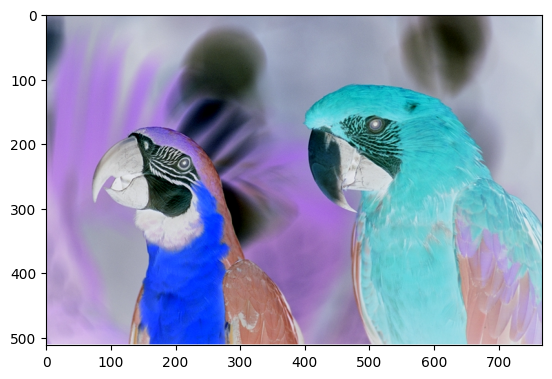

In [ ]:
img_invert = np.array(255 - img_array)

plt.imshow(img_invert)
plt.show()

## Conversão para tons de cinza

Um arquivo de imagem cujo modo seja *grayscale* ao invés do modo *RGB* contém apenas um canal de cor.

Entretanto, podemos converter uma imagem colorida para tons de cinza.

Uma possível solução, mas que geralmente não é a mais aplicada, é calcular a média dos canais de cores:

> $m = (r + g + b) / 3$
>
> (eq. 2)

Sendo:
- $m$ : Média dos canais de cores.
- $r$ : Valor do canal vermelho.
- $g$ : Valor do canal verde.
- $b$ : Valor do canal azul.

Uma vez obtido o valor de $m$, substituímos os valores de cada canal de cor ($r$, $g$, $b$) por $m$.

---
# Exercícios

**Atividade em grupo de até 3 pessoas.**

Por favor, insira a identificação de cada integrante do grupo na célula Python a seguir:

In [ ]:
# Identificação do grupo:
# VALDIR LOPES JUNIOR, 32095971
# MATHEUS HENRIQUE DA SILVA APOSTULO, 32092921

**Exercício 1.** Neste material, usamos apenas o `PIL` para carregar uma imagem. Pesquise como é possível usar o `Matplotlib`, `scikit-image` e `OpenCV` para realizar a mesma tarefa e, na célula Python a seguir, escreva um código que mostre como carregar uma mesma imagem com cada biblioteca. Em seguida, exiba a imagem que foi carregada na memória por cada biblioteca usando o `Matplotlib`.

Text(0.5, 1.0, 'Imagem com OpenCV')

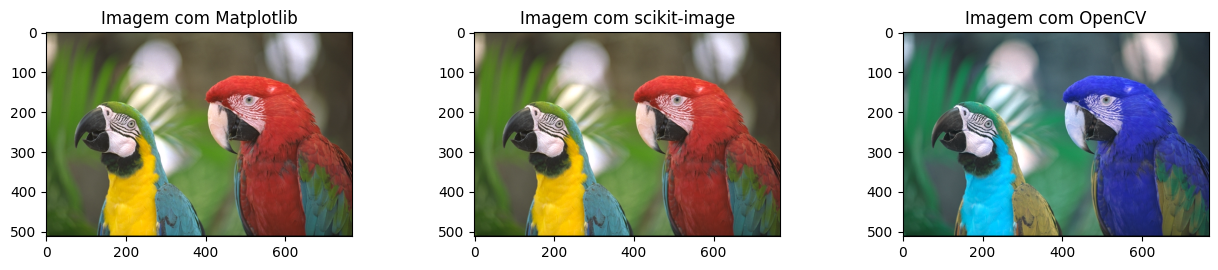

In [31]:
# Importando bibliotecas necessárias
import matplotlib.image as mpimg
from skimage import io
import cv2 as cv

# - Matplotlib
img_plt = mpimg.imread('kodim23.png')
# - scikit-image
img_ski = io.imread('kodim23.png')
# - OpenCV
img_ocv = cv.imread('kodim23.png')

# Configurar uma grade 1x3 para exibir as três imagens lado a lado com espaço entre elas
plt.figure(figsize=(15, 5))

# Espaçamento entre subplots
plt.subplots_adjust(wspace=0.4)

# Primeira imagem
plt.subplot(131)  # 1 linha, 3 colunas, primeira posição
plt.imshow(img_plt)
plt.title("Imagem com Matplotlib")

# Segunda imagem
plt.subplot(132)  # 1 linha, 3 colunas, segunda posição
plt.imshow(img_ski)
plt.title("Imagem com scikit-image")

# Terceira imagem
plt.subplot(133)  # 1 linha, 3 colunas, terceira posição
plt.imshow(img_ocv)
plt.title("Imagem com OpenCV")

**Exercício 2.** Implemente uma função `grayscale(img_color)` que recebe um array `NumPy` contendo os dados de uma imagem colorida e que retorna um array `NumPy` com a versão tons de cinza da imagem. Os tons de cinza devem ser calculados usando a equação 2. *Observação: Use a célula Python abaixo para implementar o código do exercício e a célula seguinte para testar a função.*

Exemplo de uso:

> ```python
> import numpy as np
> import matplotlib.pyplot as plt
> from PIL import Image
>
> img = Image.open('kodim23.png')
> img_array = np.array(img)
> img_array_grayscale = grayscale(img_array)
> print(f'Original: {img_array.shape} {type(img_array)}')
> print(f'Cinza: {img_array_grayscale.shape} {type(img_array_grayscale)}')
> plt.imshow(img_array_grayscale, cmap=plt.cm.gray)
> plt.show()
> ```

Saída:

> ```python
> Original: (512, 768, 3) <class 'numpy.ndarray'>
> Cinza: (512, 768) <class 'numpy.ndarray'>
> ```
> ![exercicio-saida.png](exercicio-saida.png)

In [32]:
def grayscale(img_color):
    img_bw = (img_color[..., 0] + img_color[..., 1] + img_color[..., 2]) / 3
    return img_bw

Original: (512, 768, 3) <class 'numpy.ndarray'>
Cinza: (512, 768) <class 'numpy.ndarray'>


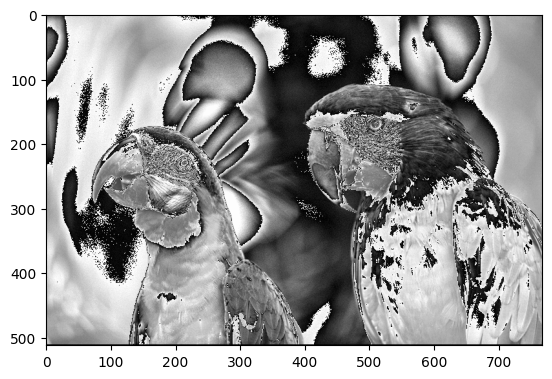

In [33]:
# Rode o código dessa célula Python para testar a sua implementação da célula anterior.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('kodim23.png')
img_array = np.array(img)
img_array_grayscale = grayscale(img_array)
print(f'Original: {img_array.shape} {type(img_array)}')
print(f'Cinza: {img_array_grayscale.shape} {type(img_array_grayscale)}')
plt.imshow(img_array_grayscale, cmap=plt.cm.gray)
plt.show()

**Exercício 3.** A biblioteca `scikit-image` possui uma função `rgb2gray()` que realiza a conversão de RGB para tons de cinza.

Verifique qual é a equação de conversão usada pelo `scikit-image` e reescreva sua função do exercício 2 de forma que a nova função use a mesma equação de conversão do `scikit-image`.

**Atenção** Não é para chamar a função `rgb2gray()` no seu código, mas para reimplementar essa função.

*Observação: Use a célula Python abaixo para implementar o código do exercício e a célula seguinte para testar a função.*

In [34]:
def grayscale2(img_color):
    img_bw = 0.2125 * img_color[..., 0] + 0.7154 * img_color[..., 1] + 0.0721 * img_color[..., 2]
    return img_bw

Original: (512, 768, 3) <class 'numpy.ndarray'>
Cinza: (512, 768) <class 'numpy.ndarray'>


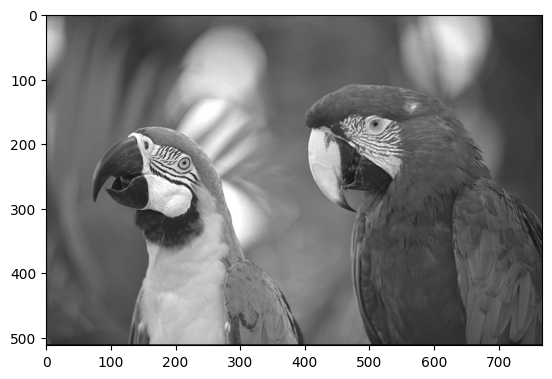

In [35]:
# Rode o código dessa célula Python para testar a sua implementação da célula anterior.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('kodim23.png')
img_array = np.array(img)
img_array_grayscale = grayscale2(img_array)
print(f'Original: {img_array.shape} {type(img_array)}')
print(f'Cinza: {img_array_grayscale.shape} {type(img_array_grayscale)}')
plt.imshow(img_array_grayscale, cmap=plt.cm.gray)
plt.show()